In [2]:
import numpy as np
import pandas as pd
import os
import warnings
warnings.filterwarnings(action='ignore')
#경고 메시지 숨기기

In [3]:

#Csv파일 불러오기

all_data = pd.read_csv(r'C:\Users\tjfsu\PycharmProjects\pythonProject\CallAPI\Greenonion_20210101_0315\all.csv', encoding='utf-8-sig')
print(all_data)


        Unnamed: 0  aucSeCode aucSeNm catgoryNm  cprInsttCode  \
0                0          1      경매     조미채소류      24000101   
1                1          1      경매     조미채소류      24000101   
2                2          1      경매     조미채소류      24000101   
3                3          1      경매     조미채소류      24000101   
4                4          1      경매     조미채소류      24000101   
...            ...        ...     ...       ...           ...   
152403        1017          1      경매     조미채소류      38040101   
152404        1018          1      경매     조미채소류      38040101   
152405        1019          1      경매     조미채소류      38040101   
152406        1020          1      경매     조미채소류      38040101   
152407        1021          1      경매     조미채소류      38040101   

        cprInsttNewCode cprMtcCode cprUsePrdlstCode cprUsePrdlstNm   delngDe  \
0               6061101     535800             5201             대파  20210102   
1               6061101     535800             5201        

## 데이터 탐색 및 전처리 ##

In [3]:
#모든 칼럼 확인
all_data.columns

Index(['Unnamed: 0', 'aucSeCode', 'aucSeNm', 'catgoryNm', 'cprInsttCode',
       'cprInsttNewCode', 'cprMtcCode', 'cprUsePrdlstCode', 'cprUsePrdlstNm',
       'delngDe', 'delngPrut', 'delngQy', 'insttNewNm', 'insttNm', 'ledgNo',
       'rnum', 'sbidPric', 'shipmntSeCode', 'shipmntSeNm', 'sleSeqn',
       'stdFrmlcNewCode', 'stdFrmlcNewNm', 'stdMtcNewCode', 'stdMtcNewNm',
       'stdPrdlstCode', 'stdPrdlstNewCode', 'stdPrdlstNewNm', 'stdPrdlstNm',
       'stdQlityNewCode', 'stdQlityNewNm', 'stdSpciesCode', 'stdSpciesNm',
       'stdUnitNewCode', 'stdUnitNewNm', 'whsalMrktCode', 'whsalMrktNewCode',
       'whsalMrktNewNm', 'whsalMrktNm', 'cprMtcNm', 'sbidTime'],
      dtype='object')

In [4]:
#행,열 크기 확인
all_data.shape

(152408, 40)

### 컬럼명 뜻 ###
aucSeCode = 경매구분코드
aucSeNm = 경매구분코드명
catgoryNm = 부류명
cprInsttCode = 도매시장법인코드
cprMtcCode = 산지코드
cprUsePrdlstCode = 법인사용품목코드
cprUsePrdlstNm = 법인사용품목명
delngDe = 경락일자
delngPrut = 거래단위량
delngQy = 거래량
insttNm = 도매시장법인명
ledgNo = 경매원표번호
rnum = 한페이지결과수
sbidPric = 거래가격
shipmntSeCode = 출하구분코드
shipmntSeNm = 출하구분명
sleSeqn = 일련번호
stdFrmlcNewCode = 포장상태코드
stdFrmlcNewNm = 포장상태명
stdMtcNewNm = 산지명
stdPrdlstCode = 품목코드
stdPrdlstNm = 품목명
stdSpciesCode = 품종코드
stdSpciesNm = 품종명
stdQlityNewCode  = 등급코드
stdUnitNewNm = 등급명
stdUnitNewCode = 거래규격단위코드
stdUnitNewNm = 거래단위명
whsalMrktCode = 도매시장코드
whsalMrktNm = 도매시장명
cprMtcNm = 산지명
sbidTime = 경매시간

In [6]:
all_data2 = all_data.rename({'aucSeCode':'경매구분코드','aucSeNm':'경매구분코드명','catgoryNm':'부류명','cprInsttCode':'도매시장법인코드','cprMtcCode':'산지코드','prUsePrdlstCode':'법인사용품목코드','cprUsePrdlstNm':'법인사용품목명','delngDe':'경락일자',' delngPrut':'거래단위량','delngQy':'거래량','insttNm':'도매시장법인명','ledgNo':'경매원표번호','rnum':'한페이지결과수','sbidPric':'거래가격','shipmntSeCode':'출하구분코드','shipmntSeNm':'출하구분명','sleSeqn':'일련번호','stdFrmlcNewCode':'포장상태코드','stdFrmlcNewNm':'포장상태명','stdMtcNewNm':'산지명',' stdPrdlstCode':'품목코드','stdPrdlstNm':'품목명','stdSpciesCode':'품종코드','stdSpciesNm':'품종명','stdQlityNewCode':'등급코드','stdUnitNewNm':'등급명','stdUnitNewCode':'거래규격단위코드','stdUnitNewNm':'거래단위명','whsalMrktCode':'도매시장코드','whsalMrktNm':'도매시장명','cprMtcNm':'산지명2','sbidTime':'경매시간'}, axis = 'columns')
all_data2

,Unnamed: 0,경매구분코드,경매구분코드명,부류명,도매시장법인코드,cprInsttNewCode,산지코드,cprUsePrdlstCode,법인사용품목명,경락일자,...,품종코드,품종명,거래규격단위코드,거래단위명,도매시장코드,whsalMrktNewCode,whsalMrktNewNm,도매시장명,산지명2,경매시간
0,0,1,경매,조미채소류,24000101,6061101,535800,5201,대파,20210102,...,120201,대파(일반),12,kg,240001,1061101,광주각화농산물도매시장,광주각화도매시장,NaN,NaN
1,1,1,경매,조미채소류,24000101,6061101,535800,5201,대파,20210102,...,120201,대파(일반),12,kg,240001,1061101,광주각화농산물도매시장,광주각화도매시장,NaN,NaN
2,2,1,경매,조미채소류,24000101,6061101,535800,5201,대파,20210102,...,120201,대파(일반),12,kg,240001,1061101,광주각화농산물도매시장,광주각화도매시장,NaN,NaN
3,3,1,경매,조미채소류,24000101,6061101,535800,5201,대파,20210102,...,120201,대파(일반),12,kg,240001,1061101,광주각화농산물도매시장,광주각화도매시장,NaN,NaN
4,4,1,경매,조미채소류,24000101,6061101,560000,5201,대파,20210102,...,120201,대파(일반),12,kg,240001,1061101,광주각화농산물도매시장,광주각화도매시장,전라북도 전주시,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152403,1017,1,경매,조미채소류,38040101,6052611,676000,5201,대파,20210113,...,120201,대파(일반),12,kg,380401,1052601,진주농산물도매시장,진주도매시장,경상남도 함양군,NaN
152404,1018,1,경매,조미채소류,38040101,6052611,676000,5201,대파,20210113,...,120201,대파(일반),12,kg,380401,1052601,진주농산물도매시장,진주도매시장,경상남도 함양군,NaN
152405,1019,1,경매,조미채소류,38040101,6052611,664600,5201,대파,20210113,...,120201,대파(일반),12,kg,380401,1052601,진주농산물도매시장,진주도매시장,NaN,NaN
152406,1020,1,경매,조미채소류,38040101,6052611,664600,5201,대파,20210113,...,120201,대파(일반),12,kg,380401,1052601,진주농산물도매시장,진주도매시장,NaN,NaN


In [21]:
all_data2

,경매구분코드,경매구분코드명,부류명,도매시장법인코드,산지코드,법인사용품목명,경락일자,거래량,도매시장법인명,경매원표번호,...,품목명,등급코드,품종코드,품종명,거래규격단위코드,거래단위명,도매시장코드,도매시장명,산지명2,경매시간
0,1,경매,조미채소류,24000101,535800,대파,20210102,150,광주원협(공),8000.0,...,대파,11,120201,대파(일반),12,kg,240001,광주각화도매시장,NaN,NaN
1,1,경매,조미채소류,24000101,535800,대파,20210102,150,광주원협(공),8000.0,...,대파,11,120201,대파(일반),12,kg,240001,광주각화도매시장,NaN,NaN
2,1,경매,조미채소류,24000101,535800,대파,20210102,150,광주원협(공),8000.0,...,대파,11,120201,대파(일반),12,kg,240001,광주각화도매시장,NaN,NaN
3,1,경매,조미채소류,24000101,535800,대파,20210102,150,광주원협(공),8000.0,...,대파,11,120201,대파(일반),12,kg,240001,광주각화도매시장,NaN,NaN
4,1,경매,조미채소류,24000101,560000,대파,20210102,200,광주원협(공),8001.0,...,대파,11,120201,대파(일반),12,kg,240001,광주각화도매시장,전라북도 전주시,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152403,1,경매,조미채소류,38040101,676000,대파,20210113,110,진주원협(공),7105.0,...,대파,11,120201,대파(일반),12,kg,380401,진주도매시장,경상남도 함양군,NaN
152404,1,경매,조미채소류,38040101,676000,대파,20210113,12,진주원협(공),7105.0,...,대파,19,120201,대파(일반),12,kg,380401,진주도매시장,경상남도 함양군,NaN
152405,1,경매,조미채소류,38040101,664600,대파,20210113,110,진주원협(공),7120.0,...,대파,11,120201,대파(일반),12,kg,380401,진주도매시장,NaN,NaN
152406,1,경매,조미채소류,38040101,664600,대파,20210113,110,진주원협(공),7120.0,...,대파,11,120201,대파(일반),12,kg,380401,진주도매시장,NaN,NaN


In [5]:
# 필요없는 컬럼 삭제 
all_data.columns


Index(['Unnamed: 0', 'aucSeCode', 'aucSeNm', 'catgoryNm', 'cprInsttCode',
       'cprInsttNewCode', 'cprMtcCode', 'cprUsePrdlstCode', 'cprUsePrdlstNm',
       'delngDe', 'delngPrut', 'delngQy', 'insttNewNm', 'insttNm', 'ledgNo',
       'rnum', 'sbidPric', 'shipmntSeCode', 'shipmntSeNm', 'sleSeqn',
       'stdFrmlcNewCode', 'stdFrmlcNewNm', 'stdMtcNewCode', 'stdMtcNewNm',
       'stdPrdlstCode', 'stdPrdlstNewCode', 'stdPrdlstNewNm', 'stdPrdlstNm',
       'stdQlityNewCode', 'stdQlityNewNm', 'stdSpciesCode', 'stdSpciesNm',
       'stdUnitNewCode', 'stdUnitNewNm', 'whsalMrktCode', 'whsalMrktNewCode',
       'whsalMrktNewNm', 'whsalMrktNm', 'cprMtcNm', 'sbidTime'],
      dtype='object')

In [8]:
all_data

,Unnamed: 0,aucSeCode,aucSeNm,catgoryNm,cprInsttCode,cprInsttNewCode,cprMtcCode,cprUsePrdlstCode,cprUsePrdlstNm,delngDe,...,stdSpciesCode,stdSpciesNm,stdUnitNewCode,stdUnitNewNm,whsalMrktCode,whsalMrktNewCode,whsalMrktNewNm,whsalMrktNm,cprMtcNm,sbidTime
0,0,1,경매,조미채소류,24000101,6061101,535800,5201,대파,20210102,...,120201,대파(일반),12,kg,240001,1061101,광주각화농산물도매시장,광주각화도매시장,NaN,NaN
1,1,1,경매,조미채소류,24000101,6061101,535800,5201,대파,20210102,...,120201,대파(일반),12,kg,240001,1061101,광주각화농산물도매시장,광주각화도매시장,NaN,NaN
2,2,1,경매,조미채소류,24000101,6061101,535800,5201,대파,20210102,...,120201,대파(일반),12,kg,240001,1061101,광주각화농산물도매시장,광주각화도매시장,NaN,NaN
3,3,1,경매,조미채소류,24000101,6061101,535800,5201,대파,20210102,...,120201,대파(일반),12,kg,240001,1061101,광주각화농산물도매시장,광주각화도매시장,NaN,NaN
4,4,1,경매,조미채소류,24000101,6061101,560000,5201,대파,20210102,...,120201,대파(일반),12,kg,240001,1061101,광주각화농산물도매시장,광주각화도매시장,전라북도 전주시,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152403,1017,1,경매,조미채소류,38040101,6052611,676000,5201,대파,20210113,...,120201,대파(일반),12,kg,380401,1052601,진주농산물도매시장,진주도매시장,경상남도 함양군,NaN
152404,1018,1,경매,조미채소류,38040101,6052611,676000,5201,대파,20210113,...,120201,대파(일반),12,kg,380401,1052601,진주농산물도매시장,진주도매시장,경상남도 함양군,NaN
152405,1019,1,경매,조미채소류,38040101,6052611,664600,5201,대파,20210113,...,120201,대파(일반),12,kg,380401,1052601,진주농산물도매시장,진주도매시장,NaN,NaN
152406,1020,1,경매,조미채소류,38040101,6052611,664600,5201,대파,20210113,...,120201,대파(일반),12,kg,380401,1052601,진주농산물도매시장,진주도매시장,NaN,NaN


In [7]:
all_data2.drop(['Unnamed: 0','cprInsttNewCode','cprUsePrdlstCode','delngPrut','insttNewNm','stdMtcNewCode','stdPrdlstCode','stdPrdlstNewCode','stdPrdlstNewNm','stdQlityNewNm','whsalMrktNewCode','whsalMrktNewNm'], axis=1, inplace=True)


In [23]:
all_data2

,경매구분코드,경매구분코드명,도매시장법인코드,산지코드,경락일자,거래량,도매시장법인명,거래가격,출하구분코드,출하구분명,...,포장상태명,산지명,등급코드,품종명,거래규격단위코드,거래단위명,도매시장코드,도매시장명,산지명2,경매시간
0,1,경매,24000101,535800,20210102,150,광주원협(공),4300,3.0,개별,...,단,전라남도 신안군,11,대파(일반),12,kg,240001,광주각화도매시장,NaN,NaN
1,1,경매,24000101,535800,20210102,150,광주원협(공),4400,3.0,개별,...,단,전라남도 신안군,11,대파(일반),12,kg,240001,광주각화도매시장,NaN,NaN
2,1,경매,24000101,535800,20210102,150,광주원협(공),4500,3.0,개별,...,단,전라남도 신안군,11,대파(일반),12,kg,240001,광주각화도매시장,NaN,NaN
3,1,경매,24000101,535800,20210102,150,광주원협(공),4700,3.0,개별,...,단,전라남도 신안군,11,대파(일반),12,kg,240001,광주각화도매시장,NaN,NaN
4,1,경매,24000101,560000,20210102,200,광주원협(공),5500,3.0,개별,...,단,전라북도 전주시,11,대파(일반),12,kg,240001,광주각화도매시장,전라북도 전주시,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152403,1,경매,38040101,676000,20210113,110,진주원협(공),6900,3.0,개별,...,단,경상남도 함양군,11,대파(일반),12,kg,380401,진주도매시장,경상남도 함양군,NaN
152404,1,경매,38040101,676000,20210113,12,진주원협(공),12000,3.0,개별,...,단,경상남도 함양군,19,대파(일반),12,kg,380401,진주도매시장,경상남도 함양군,NaN
152405,1,경매,38040101,664600,20210113,110,진주원협(공),6900,3.0,개별,...,단,경상남도 사천시,11,대파(일반),12,kg,380401,진주도매시장,NaN,NaN
152406,1,경매,38040101,664600,20210113,110,진주원협(공),6900,3.0,개별,...,단,경상남도 사천시,11,대파(일반),12,kg,380401,진주도매시장,NaN,NaN


In [8]:
df = all_data2.drop(['부류명','법인사용품목명','품목명','품종코드','경매원표번호', '한페이지결과수'], axis=1, inplace=True)
df

In [24]:
all_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152408 entries, 0 to 152407
Data columns (total 22 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   경매구분코드    152408 non-null  int64  
 1   경매구분코드명   151366 non-null  object 
 2   도매시장법인코드  152408 non-null  int64  
 3   산지코드      152408 non-null  object 
 4   경락일자      152408 non-null  int64  
 5   거래량       152408 non-null  int64  
 6   도매시장법인명   152408 non-null  object 
 7   거래가격      152408 non-null  int64  
 8   출하구분코드    121568 non-null  float64
 9   출하구분명     121568 non-null  object 
 10  일련번호      152408 non-null  object 
 11  포장상태코드    152408 non-null  object 
 12  포장상태명     152408 non-null  object 
 13  산지명       147022 non-null  object 
 14  등급코드      152408 non-null  object 
 15  품종명       152408 non-null  object 
 16  거래규격단위코드  152408 non-null  int64  
 17  거래단위명     152408 non-null  object 
 18  도매시장코드    152408 non-null  int64  
 19  도매시장명     152408 non-null  object 
 20  산지명2

In [9]:
all_data2.describe()

,경매구분코드,도매시장법인코드,경락일자,거래량,거래가격,출하구분코드,거래규격단위코드,도매시장코드
count,152408.000000,1.524080e+05,1.524080e+05,152408.000000,152408.000000,121568.000000,152408.000000,152408.000000
mean,1.237205,2.430404e+07,2.021019e+07,218.464109,14110.667918,2.527195,11.999961,243040.328250
std,0.542997,8.433905e+06,7.381346e+01,290.930666,15199.319725,0.807243,0.006274,84339.052344
min,1.000000,1.100010e+07,2.021010e+07,-550.000000,100.000000,1.000000,11.000000,110001.000000
25%,1.000000,2.100010e+07,2.021012e+07,75.000000,3900.000000,2.000000,12.000000,210001.000000
50%,1.000000,2.400010e+07,2.021020e+07,155.500000,5500.000000,3.000000,12.000000,240001.000000
75%,1.000000,3.112010e+07,2.021022e+07,300.000000,22100.000000,3.000000,12.000000,311201.000000
max,8.000000,3.804010e+07,2.021032e+07,14000.000000,110000.000000,5.000000,12.000000,380401.000000


In [16]:
df_date = all_data2.sort_values(by='경락일자')
df_date

,경매구분코드,경매구분코드명,도매시장법인코드,산지코드,경락일자,거래량,도매시장법인명,거래가격,출하구분코드,출하구분명,...,포장상태명,산지명,등급코드,품종명,거래규격단위코드,거래단위명,도매시장코드,도매시장명,산지명2,경매시간
0,1,경매,24000101,535800,20210102,150,광주원협(공),4300,3.0,개별,...,단,전라남도 신안군,11,대파(일반),12,kg,240001,광주각화도매시장,NaN,NaN
76229,2,정가수의,38020101,907000,20210102,250,울산원협(공),2300,3.0,개별,...,단,울산광역시,12,깐대파,12,kg,380201,울산도매시장,울산광역시,NaN
76228,2,정가수의,38020101,907000,20210102,80,울산원협(공),2300,3.0,개별,...,단,울산광역시,12,깐대파,12,kg,380201,울산도매시장,울산광역시,NaN
76227,2,정가수의,38020101,907000,20210102,50,울산원협(공),2300,3.0,개별,...,단,울산광역시,12,깐대파,12,kg,380201,울산도매시장,울산광역시,NaN
76226,2,정가수의,38020101,907000,20210102,15,울산원협(공),13000,3.0,개별,...,봉지,울산광역시,12,깐대파,12,kg,380201,울산도매시장,울산광역시,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147984,1,경매,21000101,232948,20210315,200,농협부산(공),3080,3.0,개별,...,단,강원도 평창군,12,대파(일반),12,kg,210001,부산엄궁도매시장,NaN,NaN
147983,1,경매,21000101,232948,20210315,200,농협부산(공),3050,3.0,개별,...,단,강원도 평창군,12,대파(일반),12,kg,210001,부산엄궁도매시장,NaN,NaN
147982,1,경매,21000101,902000,20210315,300,농협부산(공),3510,2.0,계통,...,단,부산광역시,12,대파(일반),12,kg,210001,부산엄궁도매시장,부산광역시,NaN
147992,1,경매,21000103,902000,20210315,300,항도청과,4000,3.0,개별,...,단,부산광역시,11,대파(일반),12,kg,210001,부산엄궁도매시장,부산광역시,NaN


In [14]:
#결측치 합계->결측치를 어떻게 처리할 것인가?
df_date.isnull().sum()

경매구분코드          0
경매구분코드명      1042
도매시장법인코드        0
산지코드            0
경락일자            0
거래량             0
도매시장법인명         0
거래가격            0
출하구분코드      30840
출하구분명       30840
일련번호            0
포장상태코드          0
포장상태명           0
산지명          5386
등급코드            0
품종명             0
거래규격단위코드        0
거래단위명           0
도매시장코드          0
도매시장명           0
산지명2        65632
경매시간        93832
dtype: int64

In [12]:
df_date.shape

(152408, 22)

In [17]:
df_date.head()

,경매구분코드,경매구분코드명,도매시장법인코드,산지코드,경락일자,거래량,도매시장법인명,거래가격,출하구분코드,출하구분명,...,포장상태명,산지명,등급코드,품종명,거래규격단위코드,거래단위명,도매시장코드,도매시장명,산지명2,경매시간
0,1,경매,24000101,535800,20210102,150,광주원협(공),4300,3.0,개별,...,단,전라남도 신안군,11,대파(일반),12,kg,240001,광주각화도매시장,NaN,NaN
76229,2,정가수의,38020101,907000,20210102,250,울산원협(공),2300,3.0,개별,...,단,울산광역시,12,깐대파,12,kg,380201,울산도매시장,울산광역시,NaN
76228,2,정가수의,38020101,907000,20210102,80,울산원협(공),2300,3.0,개별,...,단,울산광역시,12,깐대파,12,kg,380201,울산도매시장,울산광역시,NaN
76227,2,정가수의,38020101,907000,20210102,50,울산원협(공),2300,3.0,개별,...,단,울산광역시,12,깐대파,12,kg,380201,울산도매시장,울산광역시,NaN
76226,2,정가수의,38020101,907000,20210102,15,울산원협(공),13000,3.0,개별,...,봉지,울산광역시,12,깐대파,12,kg,380201,울산도매시장,울산광역시,NaN


In [74]:
Jan_date = df_date.iloc[:64120]
Jan_date

,경매구분코드,경매구분코드명,도매시장법인코드,산지코드,경락일자,거래량,도매시장법인명,거래가격,출하구분코드,출하구분명,...,포장상태명,산지명,등급코드,품종명,거래규격단위코드,거래단위명,도매시장코드,도매시장명,산지명2,경매시간
0,1,경매,24000101,535800,20210102,150,광주원협(공),4300,3.0,개별,...,단,전라남도 신안군,11,대파(일반),12,kg,240001,광주각화도매시장,NaN,NaN
76229,2,정가수의,38020101,907000,20210102,250,울산원협(공),2300,3.0,개별,...,단,울산광역시,12,깐대파,12,kg,380201,울산도매시장,울산광역시,NaN
76228,2,정가수의,38020101,907000,20210102,80,울산원협(공),2300,3.0,개별,...,단,울산광역시,12,깐대파,12,kg,380201,울산도매시장,울산광역시,NaN
76227,2,정가수의,38020101,907000,20210102,50,울산원협(공),2300,3.0,개별,...,단,울산광역시,12,깐대파,12,kg,380201,울산도매시장,울산광역시,NaN
76226,2,정가수의,38020101,907000,20210102,15,울산원협(공),13000,3.0,개별,...,봉지,울산광역시,12,깐대파,12,kg,380201,울산도매시장,울산광역시,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99579,2,정가수의,38020101,680813,20210131,20,울산원협(공),36000,4.0,상인,...,상자,울산광역시 남구,12,대파(수입),12,kg,380201,울산도매시장,NaN,NaN
99580,2,정가수의,38020101,680813,20210131,10,울산원협(공),36000,4.0,상인,...,상자,울산광역시 남구,12,대파(수입),12,kg,380201,울산도매시장,NaN,NaN
99581,2,정가수의,38020101,680813,20210131,100,울산원협(공),36000,4.0,상인,...,상자,울산광역시 남구,12,대파(수입),12,kg,380201,울산도매시장,NaN,NaN
99582,1,경매,38020102,626000,20210131,40,울산중앙청과,22000,3.0,개별,...,기타,경상남도 양산시,1Z,대파(일반),12,kg,380201,울산도매시장,경상남도 양산시,NaN


In [73]:
Feb_date = df_date.iloc[64121:119915]#2월 64121~119914
Feb_date

,경매구분코드,경매구분코드명,도매시장법인코드,산지코드,경락일자,거래량,도매시장법인명,거래가격,출하구분코드,출하구분명,...,포장상태명,산지명,등급코드,품종명,거래규격단위코드,거래단위명,도매시장코드,도매시장명,산지명2,경매시간
24844,1,경매,38010101,641111,20210201,100,창원청과,5100,3.0,개별,...,기타,경상남도 창원시,11,대파(일반),12,kg,380101,창원팔용도매시장,NaN,2021-02-01 5:22
24843,1,경매,37150102,730010,20210201,10,구미중앙청과,12000,3.0,개별,...,기타,경상북도 구미시,12,대파(일반),12,kg,371501,구미도매시장,NaN,2021-02-01 8:47
24842,1,경매,37150102,730010,20210201,15,구미중앙청과,15500,3.0,개별,...,기타,경상북도 구미시,11,대파(일반),12,kg,371501,구미도매시장,NaN,2021-02-01 8:47
24841,1,경매,37150102,730010,20210201,15,구미중앙청과,15500,3.0,개별,...,기타,경상북도 구미시,11,대파(일반),12,kg,371501,구미도매시장,NaN,2021-02-01 8:46
24840,1,경매,37150102,730010,20210201,4,구미중앙청과,20300,4.0,상인,...,기타,경상북도 구미시,13,대파(일반),12,kg,371501,구미도매시장,NaN,2021-02-01 8:38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52918,2,정가수의,11000802,535000,20210227,200,서부청과,5200,NaN,NaN,...,단,전라남도 신안군,11,대파(일반),12,kg,110008,서울강서도매시장,전라남도 신안군,2021-02-27 ::
52921,1,경매,11000803,215000,20210227,550,강서청과,5100,NaN,NaN,...,PE대,강원도 양양군,1Z,대파(일반),12,kg,110008,서울강서도매시장,강원도 양양군,2021-02-27 ::
52916,1,경매,11000802,535000,20210227,500,서부청과,5200,NaN,NaN,...,단,전라남도 신안군,11,대파(일반),12,kg,110008,서울강서도매시장,전라남도 신안군,2021-02-27 ::
52917,1,경매,11000802,535000,20210227,500,서부청과,5200,NaN,NaN,...,단,전라남도 신안군,11,대파(일반),12,kg,110008,서울강서도매시장,전라남도 신안군,2021-02-27 ::


In [75]:
Mar_date = df_date.iloc[119915:]#2월 64121~119914
Mar_date

,경매구분코드,경매구분코드명,도매시장법인코드,산지코드,경락일자,거래량,도매시장법인명,거래가격,출하구분코드,출하구분명,...,포장상태명,산지명,등급코드,품종명,거래규격단위코드,거래단위명,도매시장코드,도매시장명,산지명2,경매시간
54663,1,경매,25000301,535000,20210301,270,대전중앙청과,11600,1.0,협동,...,단,전라남도 신안군,1Z,대파(일반),12,kg,250003,대전노은도매시장,전라남도 신안군,NaN
54662,2,정가수의,25000301,535000,20210301,123,대전중앙청과,11600,1.0,협동,...,파렛트,전라남도 신안군,1Z,대파(일반),12,kg,250003,대전노은도매시장,전라남도 신안군,NaN
54661,1,경매,25000301,535000,20210301,85,대전중앙청과,21600,1.0,협동,...,단,전라남도 신안군,1Z,대파(일반),12,kg,250003,대전노은도매시장,전라남도 신안군,NaN
54658,1,경매,25000301,535000,20210301,120,대전중앙청과,23000,1.0,협동,...,단,전라남도 신안군,1Z,대파(일반),12,kg,250003,대전노은도매시장,전라남도 신안군,NaN
54659,1,경매,25000301,535000,20210301,122,대전중앙청과,23200,1.0,협동,...,단,전라남도 신안군,1Z,대파(일반),12,kg,250003,대전노은도매시장,전라남도 신안군,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147984,1,경매,21000101,232948,20210315,200,농협부산(공),3080,3.0,개별,...,단,강원도 평창군,12,대파(일반),12,kg,210001,부산엄궁도매시장,NaN,NaN
147983,1,경매,21000101,232948,20210315,200,농협부산(공),3050,3.0,개별,...,단,강원도 평창군,12,대파(일반),12,kg,210001,부산엄궁도매시장,NaN,NaN
147982,1,경매,21000101,902000,20210315,300,농협부산(공),3510,2.0,계통,...,단,부산광역시,12,대파(일반),12,kg,210001,부산엄궁도매시장,부산광역시,NaN
147992,1,경매,21000103,902000,20210315,300,항도청과,4000,3.0,개별,...,단,부산광역시,11,대파(일반),12,kg,210001,부산엄궁도매시장,부산광역시,NaN


In [76]:
Jan_date.to_csv('202101.csv', encoding='utf-8-sig')

In [77]:
Feb_date.to_csv('202102.csv', encoding='utf-8-sig')

In [79]:
Mar_date.to_csv('202103.csv', encoding='utf-8-sig')

In [121]:
#2021 2월 대파 평균 거래량


#경락일자 20210201~20210230까지만 모아서 거래량 그룹바이 출력




20210208    3734
20210210    3544
20210205    3442
20210104    3358
20210209    3282
            ... 
20210220    1836
20210211    1242
20210207     176
20210102     112
20210131       8
Name: 경락일자, Length: 62, dtype: int64

In [120]:
#2021 1~3월 대파 12Kg당 평균 거래가격
trading_price = df_date['거래가격'].describe()
trading_price

count    152408.000000
mean      14110.667918
std       15199.319725
min         100.000000
25%        3900.000000
50%        5500.000000
75%       22100.000000
max      110000.000000
Name: 거래가격, dtype: float64

In [51]:
#2021 1~3월 대파 평균 거래량 
trading_volume = df_date['거래량'].describe()
trading_volume

count    152408.000000
mean        218.464109
std         290.930666
min        -550.000000
25%          75.000000
50%         155.500000
75%         300.000000
max       14000.000000
Name: 거래량, dtype: float64

In [119]:
#대파 총 거래량 합계
Sum_trading_volume = df_date['거래량'].sum()
Sum_trading_volume

33295678

In [52]:
trading_price = df_date['거래가격'].describe()
trading_price

count    152408.000000
mean      14110.667918
std       15199.319725
min         100.000000
25%        3900.000000
50%        5500.000000
75%       22100.000000
max      110000.000000
Name: 거래가격, dtype: float64

## 데이터 시각화 ##

In [29]:
df_date['품종명'].value_counts() 

대파(일반)    142240
깐대파         5464
대파(수입)      3520
기타          1024
중파           160
Name: 품종명, dtype: int64

In [46]:
import matplotlib.pyplot as plt
import platform
#X,Ylabel 한글깨짐처리
import matplotlib.font_manager as fm
path = r'C:\Users\tjfsu\Downloads\NanumBarunGothic.ttf'
fontprop = fm.FontProperties(fname=path, size=18)

#index 한글깨짐
if platform.system()=='Windows':
    plt.rc('font', family='Malgun Gothic')

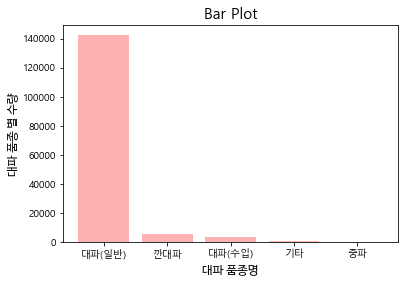

In [47]:
bar_df = df_date['품종명'].value_counts().reset_index()
plt.title("Bar Plot", fontsize=15)
plt.bar(bar_df["index"], bar_df["품종명"],color='r', alpha=.3)
plt.ylabel("대파 품종 별 수량", fontproperties=fontprop, fontsize=12)
plt.xlabel("대파 품종명", fontproperties=fontprop, fontsize=12)
plt.show()

In [84]:
market_counts = df_date['도매시장명'].value_counts()#도매시장 별 거래건수
market_counts

TypeError: 'tuple' object is not callable

In [117]:
#산지 별 거래량 합계
sum_trading_volume2 = df_date.groupby(df_date['산지명'])['거래량'].sum().reset_index()
sum_trading_volume2

,산지명,거래량
0,강원도,2080
1,강원도 강릉시,262016
2,강원도 고성군,34
3,강원도 동해시,3560
4,강원도 양양군,519900
...,...,...
156,충청북도 음성군,1152
157,충청북도 제천시,23140
158,충청북도 증평군,3280
159,충청북도 청주시,776356


In [88]:
sum_trading_volume = df_date.groupby(df_date['도매시장명'])['거래량'].sum().reset_index()
#도매시장 별 거래량 합계
sum_trading_volume

,도매시장명,거래량
0,강릉도매시장,343992
1,광주각화도매시장,819470
2,광주서부도매시장,606950
3,구리도매시장,2880474
4,구미도매시장,23862
5,대구북부도매시장,2658118
6,대전노은도매시장,549138
7,대전오정도매시장,1725634
8,목포농산시장,5652
9,부산반여도매시장,2143882


In [89]:
df_market_trading_volume = pd.DataFrame(sum_trading_volume)
df_market_trading_volume

,도매시장명,거래량
0,강릉도매시장,343992
1,광주각화도매시장,819470
2,광주서부도매시장,606950
3,구리도매시장,2880474
4,구미도매시장,23862
5,대구북부도매시장,2658118
6,대전노은도매시장,549138
7,대전오정도매시장,1725634
8,목포농산시장,5652
9,부산반여도매시장,2143882


In [102]:
df_market_trading_volume.columns.values[0]='도매시장명'
df_market_trading_volume

,도매시장명,거래량_합계
0,강릉도매시장,343992
1,광주각화도매시장,819470
2,광주서부도매시장,606950
3,구리도매시장,2880474
4,구미도매시장,23862
5,대구북부도매시장,2658118
6,대전노은도매시장,549138
7,대전오정도매시장,1725634
8,목포농산시장,5652
9,부산반여도매시장,2143882


In [111]:
#도매시장별 거래량 
asc_df_MTV = df_market_trading_volume.sort_values('거래량', ascending=False).reset_index()
asc_df_MTV

,index,도매시장명,거래량_합계
0,11,서울가락도매시장,5620166
1,12,서울강서도매시장,4587628
2,3,구리도매시장,2880474
3,5,대구북부도매시장,2658118
4,10,부산엄궁도매시장,2450058
5,21,인천삼산도매시장,2253166
6,9,부산반여도매시장,2143882
7,20,인천남촌도매시장,1813950
8,7,대전오정도매시장,1725634
9,15,안산도매시장,1059874


In [118]:
#산지별 거래량
asc_df_MTV2 = sum_trading_volume2.sort_values('거래량', ascending=False).reset_index()
asc_df_MTV2

,index,산지명,거래량
0,114,전라남도 신안군,8514048
1,121,전라남도 진도군,8247556
2,78,부산광역시,1705628
3,16,경기도 구리시,1436180
4,37,경상남도 김해시,817078
...,...,...,...
156,36,경상남도 고성군,22
157,63,경상북도 포항시,20
158,94,울산광역시 울주군,14
159,149,충청남도 청양군,6


In [92]:
df_market_trading_volume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   도매시장명   31 non-null     object
 1   거래량     31 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 624.0+ bytes


In [95]:
df_market_trading_volume.describe()

,거래량_합계
count,3.100000e+01
mean,1.074054e+06
std,1.396251e+06
min,2.280000e+02
25%,1.672260e+05
50%,4.659720e+05
75%,1.769792e+06
max,5.620166e+06


In [104]:
df_market_trading_volume['도매시장명']

0       강릉도매시장
1     광주각화도매시장
2     광주서부도매시장
3       구리도매시장
4       구미도매시장
5     대구북부도매시장
6     대전노은도매시장
7     대전오정도매시장
8       목포농산시장
9     부산반여도매시장
10    부산엄궁도매시장
11    서울가락도매시장
12    서울강서도매시장
13      수원도매시장
14      순천도매시장
15      안산도매시장
16      안양도매시장
17      울산도매시장
18      원주도매시장
19      익산도매시장
20    인천남촌도매시장
21    인천삼산도매시장
22      전주도매시장
23      정읍도매시장
24      진주도매시장
25    창원내서도매시장
26    창원팔용도매시장
27      천안도매시장
28      청주도매시장
29      춘천도매시장
30      충주도매시장
Name: 도매시장명, dtype: object

In [105]:
df_market_trading_volume['거래량']

0      343992
1      819470
2      606950
3     2880474
4       23862
5     2658118
6      549138
7     1725634
8        5652
9     2143882
10    2450058
11    5620166
12    4587628
13     465972
14     226828
15    1059874
16     864432
17     186914
18     188704
19       5814
20    1813950
21    2253166
22       6976
23        228
24     124410
25     212644
26     401250
27     493238
28     385684
29      43032
30     147538
Name: 거래량, dtype: int64

In [ ]:
trace = go.Bar(x=asc_df_MTV['도매시장명'], y=asc_df_MTV['거래량_합계'],)
data = [trace]
layout = go.Layout(title='전국 도매시장 별 대파 거래량 합계 비교')
fig = go.Figure(data=data, layout=layout)
pyo.iplot(fig)


In [116]:
!pip install plotly

import plotly.offline as pyo
import plotly.graph_objs as go

trace = go.Bar(x=asc_df_MTV['도매시장명'], y=asc_df_MTV['거래량_합계'],)
data = [trace]
layout = go.Layout(title='전국 도매시장 별 대파 거래량 합계 비교')
fig = go.Figure(data=data, layout=layout)
pyo.iplot(fig)


ConversionError: Failed to convert value(s) to axis units: Index(['강릉도매시장', '광주각화도매시장', '광주서부도매시장', '구리도매시장', '구미도매시장', '대구북부도매시장',
       '대전노은도매시장', '대전오정도매시장', '목포농산시장', '부산반여도매시장', '부산엄궁도매시장', '서울가락도매시장',
       '서울강서도매시장', '수원도매시장', '순천도매시장', '안산도매시장', '안양도매시장', '울산도매시장', '원주도매시장',
       '익산도매시장', '인천남촌도매시장', '인천삼산도매시장', '전주도매시장', '정읍도매시장', '진주도매시장',
       '창원내서도매시장', '창원팔용도매시장', '천안도매시장', '청주도매시장', '춘천도매시장', '충주도매시장'],
      dtype='object', name='도매시장명')

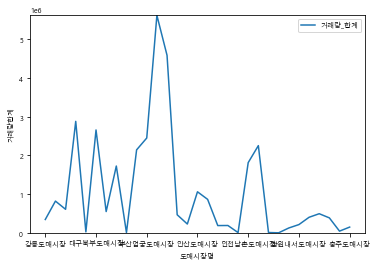

In [75]:
# #꺾은선 그래프
# plt.rc('font', family='Malgun Gothic', size=7)      
# df_market_trading_volume.plot()
# plt.ylabel('거래량합계')   # y축 이름 설정
# plt.ylim([0,5.620166e+06])    # y축 범위 설정
# plt.xticks(df_market_trading_volume.index)   # x축 눈금 변경
# plt.title('도매시장 별 대파 거래량 합계')  # plot 제목 설정



RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

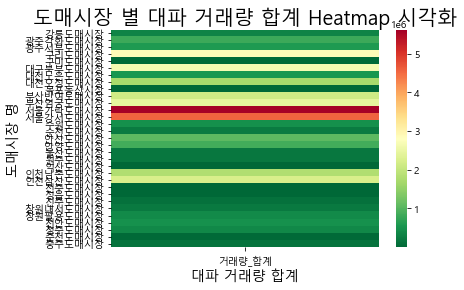

In [72]:
# 히트맵 컬럼은 여러 군으로 분류되어 있어야 이쁘게 나옴
# import seaborn as sns#heatmap

# sns.heatmap(df_market_trading_volume, cmap='RdYlGn_r')
# plt.xticks(np.arange(0.5, len(df_market_trading_volume.columns), 1), df_market_trading_volume.columns)
# plt.yticks(np.arange(0.5, len(df_market_trading_volume.index), 1), df_market_trading_volume.index)
# plt.title('도매시장 별 대파 거래량 합계 Heatmap 시각화', fontsize=20)
# plt.xlabel('대파 거래량 합계', fontsize=14)
# plt.ylabel('도매시장 명', fontsize=14)
# plt.colorbar()

# plt.show()

In [ ]:
df_date.columns.values[13]="산지명1"
df_date#산지명 2개 중복으로 들어가서 인덱스번호로 컬럼명변경

In [ ]:
df_date['산지명1'].value_counts()#시각화

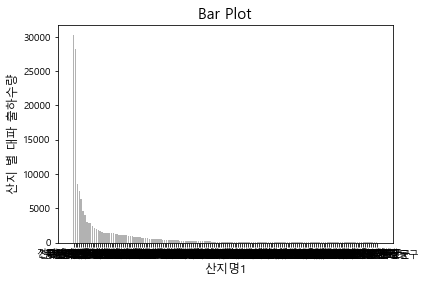

In [49]:
bar_df = df_date['산지명'].value_counts().reset_index()
plt.title("Bar Plot", fontsize=15)
plt.bar(bar_df["index"], bar_df["산지명"],color='k', alpha=.3)
plt.ylabel("산지 별 대파 출하수량", fontsize=12)
plt.xlabel("산지명1", fontsize=12)
plt.show()

In [48]:
df_date['산지명'].value_counts()#지도시각화

전라남도 진도군     30216
전라남도 신안군     28176
경기도 구리시       8464
부산광역시         7476
충청북도 청주시      6298
             ...  
인천광역시 옹진군        2
강원도 고성군          2
경상남도 산청군         2
충청남도             2
서울특별시 강동구        2
Name: 산지명, Length: 161, dtype: int64

In [ ]:
#데이터 탐색(4분위,평균,중간값유도)

#평균 1일 거래량 

